In [165]:
# 라이브러리를 불러옵니다.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib as mpl

In [166]:
mpl.rcParams['font.family'] = 'AppleGothic'
mpl.rcParams['axes.unicode_minus'] =False

In [167]:
df = pd.read_csv("./실습데이터.csv")

In [168]:
df.head()

,거래id,유형,고객id,코스ID,사이트,포맷,카테고리,코스(상품) 이름,거래일자,쿠폰이름,판매가격,결제수단,실거래금액,쿠폰할인액,거래금액,환불금액
0,2417084,PAYMENT,20053,209016,FASTCAMPUS,올인원,업무 생산성,올인원 패키지 : 김왼손의 파이썬 업무자동화 유치원,2022. 12. 31. 오후 10:12:33,-,189000,TRANSFER,159000,-,159000,-
1,2415408,PAYMENT,58309,210664,FASTCAMPUS,올인원,부동산/금융,초격차 패키지 : 한 번에 끝내는 부동산 금융(PF) 실무,2022. 12. 30. 오후 6:12:57,-,501000,TRANSFER,501000,-,501000,-
2,2413897,PAYMENT,18075,211782,FASTCAMPUS,올인원,영상/3D,편집하는여자의 영상편집 마스터클래스 - 제 6강 다양한 효과를 응용하여 애프터이펙트...,2022. 12. 31. 오후 11:12:15,-,549000,CARD,549000,-,549000,-
3,2413891,PAYMENT,41898,213450,FASTCAMPUS,올인원,프로그래밍,초격차 패키지 : 35개 프로젝트로 배우는 Android 앱 개발 feat. Jet...,2022. 12. 31. 오후 11:12:03,[WELCOME] 프로그래밍 3만원할인,165000,CARD,135000,30000,135000,-
4,2413887,PAYMENT,94328,210773,FASTCAMPUS,올인원,프로그래밍,"초격차 패키지 : 개발자 취업 합격 패스 With 코딩테스트, 기술면접",2022. 12. 31. 오후 11:12:10,-,239000,CARD,239000,-,239000,-


In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159328 entries, 0 to 159327
Data columns (total 16 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   거래id       159328 non-null  int64 
 1   유형         159328 non-null  object
 2   고객id       159328 non-null  int64 
 3   코스ID       159328 non-null  int64 
 4   사이트        159328 non-null  object
 5   포맷         159328 non-null  object
 6   카테고리       159328 non-null  object
 7   코스(상품) 이름  159328 non-null  object
 8   거래일자       159328 non-null  object
 9   쿠폰이름       159328 non-null  object
 10  판매가격       159328 non-null  object
 11  결제수단       159328 non-null  object
 12  실거래금액      159328 non-null  int64 
 13  쿠폰할인액      159328 non-null  object
 14  거래금액       159328 non-null  object
 15  환불금액       159328 non-null  object
dtypes: int64(4), object(12)
memory usage: 19.4+ MB


In [170]:
# columns 를 보고 EDA 해보기.
# null값은 없다. 
# 사이트는 패스트캠퍼스 하나이니, 지워도 될 것 같다.

In [171]:
df.포맷.value_counts()

올인원    146936
RED     12392
Name: 포맷, dtype: int64

In [172]:
# 포맷은 올인원과 RED 가 있는데, 올인원이 147000개, RED는 12400개 정도 있다.
# 올인원의 특징: 23만원어치의 강의를 사면, 23만원 할인 쿠폰을 준다.

In [173]:
mask = (df.포맷 == '올인원')

df.loc[mask,'코스(상품) 이름']


0                              올인원 패키지 : 김왼손의 파이썬 업무자동화 유치원
1                          초격차 패키지 : 한 번에 끝내는 부동산 금융(PF) 실무
2         편집하는여자의 영상편집 마스터클래스 - 제 6강 다양한 효과를 응용하여 애프터이펙트...
3         초격차 패키지 : 35개 프로젝트로 배우는 Android 앱 개발 feat. Jet...
4                   초격차 패키지 : 개발자 취업 합격 패스 With 코딩테스트, 기술면접
                                ...                        
159323              올인원 패키지 : 제 2의 월급을 만들어주는 직장인 스몰비즈니스 가이드
159324    [Kit] 닷밀의 미디어아트 그래픽 클래스 : 모션그래픽 뉴패러다임 Creative...
159325                  올인원 패키지 : 파이썬을 활용한 데이터 전처리 Level UP
159326                 올인원 패키지 : 100억을 움직이는 50가지 PPT 디자인 원칙
159327                   올인원 패키지 : 머신러닝 서비스 구축을 위한 실전 MLOps
Name: 코스(상품) 이름, Length: 146936, dtype: object

In [174]:
mask2 = (df.포맷 == 'RED')

df.loc[mask2,'코스(상품) 이름']

13        The RED : 비즈니스 성공을 위한 Java/Spring 기반 서비스 개발과 M...
45        The RED : 탑 아티스트가 선택한 디렉터 : 권오준이 알려주는 영상 연출의 모든 것
66        The RED : 현실 세상의 TDD 실전편 : 설계 확장성을 위한 코드 개선 방법...
84                   The RED : 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법
96               The RED : Figma로 끝내는 모바일 UXUI 디자인 프로젝트 Kit
                                ...                        
159257    The RED : 모든 비즈니스를 성공으로 이끄는 Product Management...
159272    The RED : 탑 아티스트가 선택한 디렉터 : 권오준이 알려주는 영상 연출의 모든 것
159280                          The RED : 현실 세상의 TDD by 이규원
159285                   The RED : 우버처럼 하는 머신러닝 의사결정 by 정종빈
159311    The Red : Google 출신 엔지니어와 고성능 검색엔진 만들기 with El...
Name: 코스(상품) 이름, Length: 12392, dtype: object

In [175]:
# 더 레드 , 인증 코스, 완주반,CAMP,SCHOOL 전과정 등은 1+1 이벤트 혜택에서 제외된다.



In [176]:
# 더 레드 강의는 올인원 패키지와 다르게 1+1 으로 구매가 안된다. 프리미엄 강의 느낌 (인증되거나 유명한 강사들)
# 이 때 패스트캠퍼스의 매출에서 프리미엄 강의와, 그렇지 않은 올인원패키지 강의의 매출 비율을 파악해서
# 패스트캠퍼스가 여러 강사들을 섭외하여 올인원 패키지 강의들을 많이 출시해야할지, 고급 강사진을 더 늘려서 The Red 강의에 
# 힘을 줘야 할 지. 인사이트를 도출해보고싶다. -> 내가 고객 이라면 The Red 강의를 구매해서 페이백 받은 쿠폰으로 일반 강의를 살 것 같다.


In [177]:
df.카테고리.unique()

array(['업무 생산성', '부동산/금융', '영상/3D', '프로그래밍', '마케팅', '일러스트', '디자인',
       '데이터 사이언스', '부업/창업', '투자/재테크', '크리에이티브'], dtype=object)

In [178]:
# 카테고리별 매출이 가장 큰 카테고리 찾기.
df_category = df.groupby('카테고리')['실거래금액']

In [179]:
df_category.sum().sort_values(ascending=False)

카테고리
프로그래밍       6708714350
데이터 사이언스    4372903916
부동산/금융      2194701472
일러스트        2140823180
영상/3D       2032814565
마케팅         1686933912
업무 생산성      1542856913
디자인         1367770714
투자/재테크       447801574
부업/창업        102751487
크리에이티브               0
Name: 실거래금액, dtype: int64

In [180]:
df['카테고리'].value_counts()

프로그래밍       51705
데이터 사이언스    26859
일러스트        15443
영상/3D       13923
업무 생산성      13916
마케팅         12896
부동산/금융      10797
디자인         10211
투자/재테크       2483
부업/창업        1094
크리에이티브          1
Name: 카테고리, dtype: int64

In [181]:
# 카테고리 별 강의 수 대비 매출을 분석해서, 늘려야 할 강의 카테고리와, 그렇지 않은 카테고리를 도출

In [182]:
df_coupon = df.groupby('쿠폰이름')['실거래금액']

In [183]:
df_coupon.sum().sort_values(ascending=False)

쿠폰이름
-                                      13450368629
[WELCOME] 온라인 강의 3만원 할인                 2210054330
[WELCOME] 3월이니까? 3만원 할인!                 430824000
[4월이니까? 총 4만원 할인쿠폰] 온라인 강의 2만원 할인쿠폰      287875000
[신규가입자는 쿠폰 더!]온라인 강의 3만원 할인              286914500
                                          ...     
[무료수강권] 내부직원 강의 검수용 발행(부업창업_카테고리)                0
[무료수강권] 내부직원 강의 검수용 발행(마케팅_카테고리)                 0
[무료수강권] 내부직원 강의 검수용 발행                           0
[무료수강권] 내부 직원용_김준홍님                              0
[무료수강권] 강의 참고용 발행_조교님                            0
Name: 실거래금액, Length: 1227, dtype: int64

In [184]:
# 실거래가 완료된 강의들중, 가장 많이 적용된 쿠폰들을 통해, 어떤 쿠폰이 가장 실거래가 많았는지. 많은 이유 가설 세워보기
# => ex)인스타에 홍보가 된 쿠폰

In [185]:
df.환불금액.value_counts()

-          148010
0             156
-159000       156
-189000       134
-164000       110
            ...  
-336300         1
-138051         1
-85608          1
-118666         1
-345240         1
Name: 환불금액, Length: 1763, dtype: int64

In [186]:
# 환불이 1763건 , 금액 22억원.

In [187]:
df.환불금액.sum()

# object네.

'---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [188]:
def convert_to_int(x):
    try:
        value = int(x)
        return value if value < 0 else 0
    except ValueError:
        return 0
df['refund_amount_abs'] = df['환불금액'].apply(convert_to_int).abs()

# 총 환불 금액 계산
total_refund_amount = df['refund_amount_abs'].sum()
print("총 환불 금액:", total_refund_amount,'원')

총 환불 금액: 2255566195 원


In [189]:
df['refund_amount_abs']

0              0
1              0
2              0
3              0
4              0
           ...  
159323         0
159324         0
159325         0
159326         0
159327    345240
Name: refund_amount_abs, Length: 159328, dtype: int64

In [190]:
# 환불 금액 22억원을 최~대한 줄이는 방법 도출하여 적용해보기.

In [191]:
df.sample(10)

,거래id,유형,고객id,코스ID,사이트,포맷,카테고리,코스(상품) 이름,거래일자,쿠폰이름,판매가격,결제수단,실거래금액,쿠폰할인액,거래금액,환불금액,refund_amount_abs
146113,1606864,PAYMENT,91630,206869,FASTCAMPUS,올인원,프로그래밍,올인원 패키지 : 김민태의 프론트엔드 아카데미 : 제 2강 만들어보며 이해하는 Re...,2022. 1. 20. 오후 2:01:17,[WELCOME] 처음이라면 누구나 프로그래밍 5만원 할인,206000,CARD,156000,50000,156000,-,0
76157,1992992,PAYMENT,79869,203934,FASTCAMPUS,올인원,프로그래밍,초격차 패키지 : 한 번에 끝내는 코딩테스트 369 Java편,2022. 7. 18. 오전 10:07:55,-,151000,CARD,151000,-,151000,-,0
39935,2188447,PAYMENT,43018,205687,FASTCAMPUS,올인원,프로그래밍,올인원 패키지 : 노잼봇과 함께 배우는 파이썬 유치원,2022. 10. 5. 오전 12:10:37,[프로모션] 9월 1+1 쿠폰 이벤트,176000,PROMOTION,0,204000,0,-,0
41767,2182695,PAYMENT,99084,212600,FASTCAMPUS,올인원,일러스트,네오아카데미 : 완케의 악마와 계약하는 초단기 일러스트 성장법,2022. 10. 2. 오후 9:10:48,-,500000,CARD,500000,-,500000,-,0
47268,2148980,PAYMENT,37769,205569,FASTCAMPUS,올인원,업무 생산성,올인원 패키지 : 공여사와 무작정 풀어보는 엑셀 실무,2022. 9. 18. 오전 1:09:45,[공여사 강의 전용] 프로모션 연장 30% 할인 쿠폰,159000,VBANK,111300,47700,111300,-,0
73274,2005846,PAYMENT,43414,205747,FASTCAMPUS,올인원,프로그래밍,초격차 패키지 : 한 번에 끝내는 React의 모든 것,2022. 7. 22. 오후 6:07:25,-,242000,CARD,242000,-,242000,-,0
131750,1675638,PAYMENT,62959,208962,FASTCAMPUS,올인원,마케팅,초격차 패키지 : 한 번에 끝내는 마케팅 취업,2022. 2. 17. 오후 11:02:46,-,199000,CARD,199000,-,199000,-,0
69981,2024582,PAYMENT,82288,211798,FASTCAMPUS,올인원,데이터 사이언스,올인원 패키지 : 딥러닝/머신러닝을 활용한 시계열 데이터 분석,2022. 7. 30. 오전 9:07:05,-,202000,POINT,202000,-,202000,-,0
69933,2024850,PAYMENT,82012,211858,FASTCAMPUS,올인원,영상/3D,3D 캐릭터를 가장 쉽게 만드는 법: 아이패드 모델링,2022. 7. 30. 오후 12:07:55,-,188000,CARD,188000,-,188000,-,0
154991,1566030,PAYMENT,72143,207161,FASTCAMPUS,올인원,영상/3D,편집하는여자의 영상편집 마스터클래스 - 제 3강 디테일한 이펙트로 완성하는 프리미어,2022. 1. 5. 오후 9:01:29,[N잡스] 편집여 아카데미 제3강 3만원 할인 쿠폰,183000,CARD,153000,30000,153000,-,0


In [192]:
df.columns

Index(['거래id', '유형', '고객id', '코스ID', '사이트', '포맷', '카테고리', '코스(상품) 이름', '거래일자',
       '쿠폰이름', '판매가격', '결제수단', '실거래금액', '쿠폰할인액', '거래금액', '환불금액',
       'refund_amount_abs'],
      dtype='object')

In [193]:
# 코스 이름에 특정 단어들 ex) 초격차, 정석 , 한 번에 등 단어들을 통해 . 어떤 단어가 포함된 강의들이 
# 실거래수가 많았을까?

In [194]:
from konlpy.tag import Mecab
from PIL import Image
import nltk
import os
import re

In [195]:
mecab = Mecab()

In [196]:
FEATURE_POS = ['NNG', 'NNP', 'NNB', 'NNBC', 'NR',
               'NP', 'VV', 'VA', 'MAG'] 
#mecab 기준, 명사 & 형용사 & 동사 & 부사


def text_cleaning(doc):
    # 한국어를 제외한 글자를 제거하는 패턴.
    # doc = re.sub("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "", doc)
    
    # 특수문자를 제거하는 패턴.
    doc = re.sub("[\{\}\[\]\/?.,;:|\)*~`!^\-_+<>@\#$%&\\\=\(\'\"]", " ", doc)
    # e.g. codingiscoffee@gmail.com 을 고려해서 " "로 했음
    
    # 영문 빼고 모두 제거하는 패턴.
    #doc = doc.replace("\n", " ")
    #doc = re.sub("[^A-Za-z ]", "", doc)
    
    return doc

def define_stopwords(path):
    
    SW = set()
    # 불용어를 추가하는 방법 1.
    # SW.add("있다")
    SW.add("있어요")
    SW.add("대한")
    SW.add("합니다")
    SW.add("하는")
    SW.add("보다")
    SW.add("한다")
    SW.add("가능")
    
    
    # 불용어를 추가하는 방법 2.
    # stopwords-ko.txt에 직접 추가
    
    with open(path, encoding="utf-8") as f:
        for word in f:
            SW.add(word.strip())
            
    return SW

def text_tokenizing(doc, tokenizer):
    """
    Input Parameter :
    
    doc - tokenizing 하는 실제 데이터. 뉴스 본문 하나를 의미(현재 본문을 하니)
    tokenizer - token의 단위.
    """
    tok = mecab  # 형태소 분석기 선언.
    
    
    if tokenizer == "words":
        return [word for word in doc.split() if word not in SW and len(word) > 1]
    
    elif tokenizer == "nouns":
        # 명사만 뽑아주는 함수 .nouns --> return []
        return [token for token in tok.nouns(doc) if token not in SW and len(token) > 1]
        
    elif tokenizer == "morphs":
        # 형태소로 나눔
        return [token for token in tok.morphs(doc) if token not in SW and len(token) > 1]    
    
    elif tokenizer == "predefined":
        
        documents = []
        text_pos = [pair for pair in tok.pos(doc) if pair[0] not in SW and len(pair[0]) > 1]
        words = []

        for word, pos in text_pos:
            if pos in FEATURE_POS:
                words.append(word)

        return words

In [197]:
tokenizer = "predefined"

In [198]:
SW = define_stopwords("./stopwords-ko.txt")

In [199]:
document = df
documents = document["코스(상품) 이름"]  # 뉴스 본문 사용 -> 제목 사용 (내용 크기 이슈)
# cleaned_docs = text_cleaning(documents)
# tokenized_docs = text_tokenizing(cleaned_docs)
tokenized_documents = documents.apply(text_cleaning)\
                                .apply(lambda x : text_tokenizing(x,tokenizer))
#   .apply(func=text_tokenizing, tokenizer = tokenizer)
# 2D list
# tokenized_docs = documents.apply(text_cleaning)\
                # .apply(lambda x : text_tokenizing(x,tokenizer))

tokenized_documents

0                          [올인원, 패키지, 왼손, 파이썬, 업무, 자동, 유치원]
1                                [격차, 패키지, 끝내, 부동산, 금융, 실무]
2         [편집, 여자, 영상, 편집, 마스터클래스, 다양, 효과, 응용, 애프터, 이펙트,...
3                                   [격차, 패키지, 프로젝트, 배우, 개발]
4               [격차, 패키지, 개발자, 취업, 합격, 패스, 코딩, 테스트, 기술, 면접]
                                ...                        
159323                [올인원, 패키지, 월급, 만들, 직장, 스몰, 비즈니스, 가이드]
159324                   [미디어, 아트, 그래픽, 클래스, 모션, 그래픽, 패러다임]
159325                        [올인원, 패키지, 파이썬, 활용, 데이터, 전처리]
159326                         [올인원, 패키지, 움직이, 가지, 디자인, 원칙]
159327                      [올인원, 패키지, 머신, 러닝, 서비스, 구축, 실전]
Name: 코스(상품) 이름, Length: 159328, dtype: object

In [200]:
#빈도 분석
import nltk
from pprint import pprint
## pretty print 

#전체 Token이 원소인 리스트.
total_tokens = [token for doc in tokenized_documents for token in doc]
print(len(total_tokens))

text = nltk.Text(total_tokens)
print(len(set(text.tokens)))
# top 10 뽑기

pprint(text.vocab().most_common(10))

950817
694
[('패키지', 120008),
 ('격차', 70380),
 ('끝내', 48364),
 ('올인원', 48353),
 ('개발', 18976),
 ('데이터', 16078),
 ('배우', 14606),
 ('프로젝트', 12574),
 ('실무', 11927),
 ('러닝', 10369)]


In [201]:
# 빈도 출력 갯수.
from nltk import FreqDist

topN = 100

x = []
y = []
wordInfo = dict()

for vocab, count in text.vocab().most_common(topN):
    x.append(vocab)
    y.append(count)
    wordInfo[vocab] = count
    
test = {"Counts" : x, "Samples" : y}
print(x[:5])
print(y[:5])

['패키지', '격차', '끝내', '올인원', '개발']
[120008, 70380, 48364, 48353, 18976]


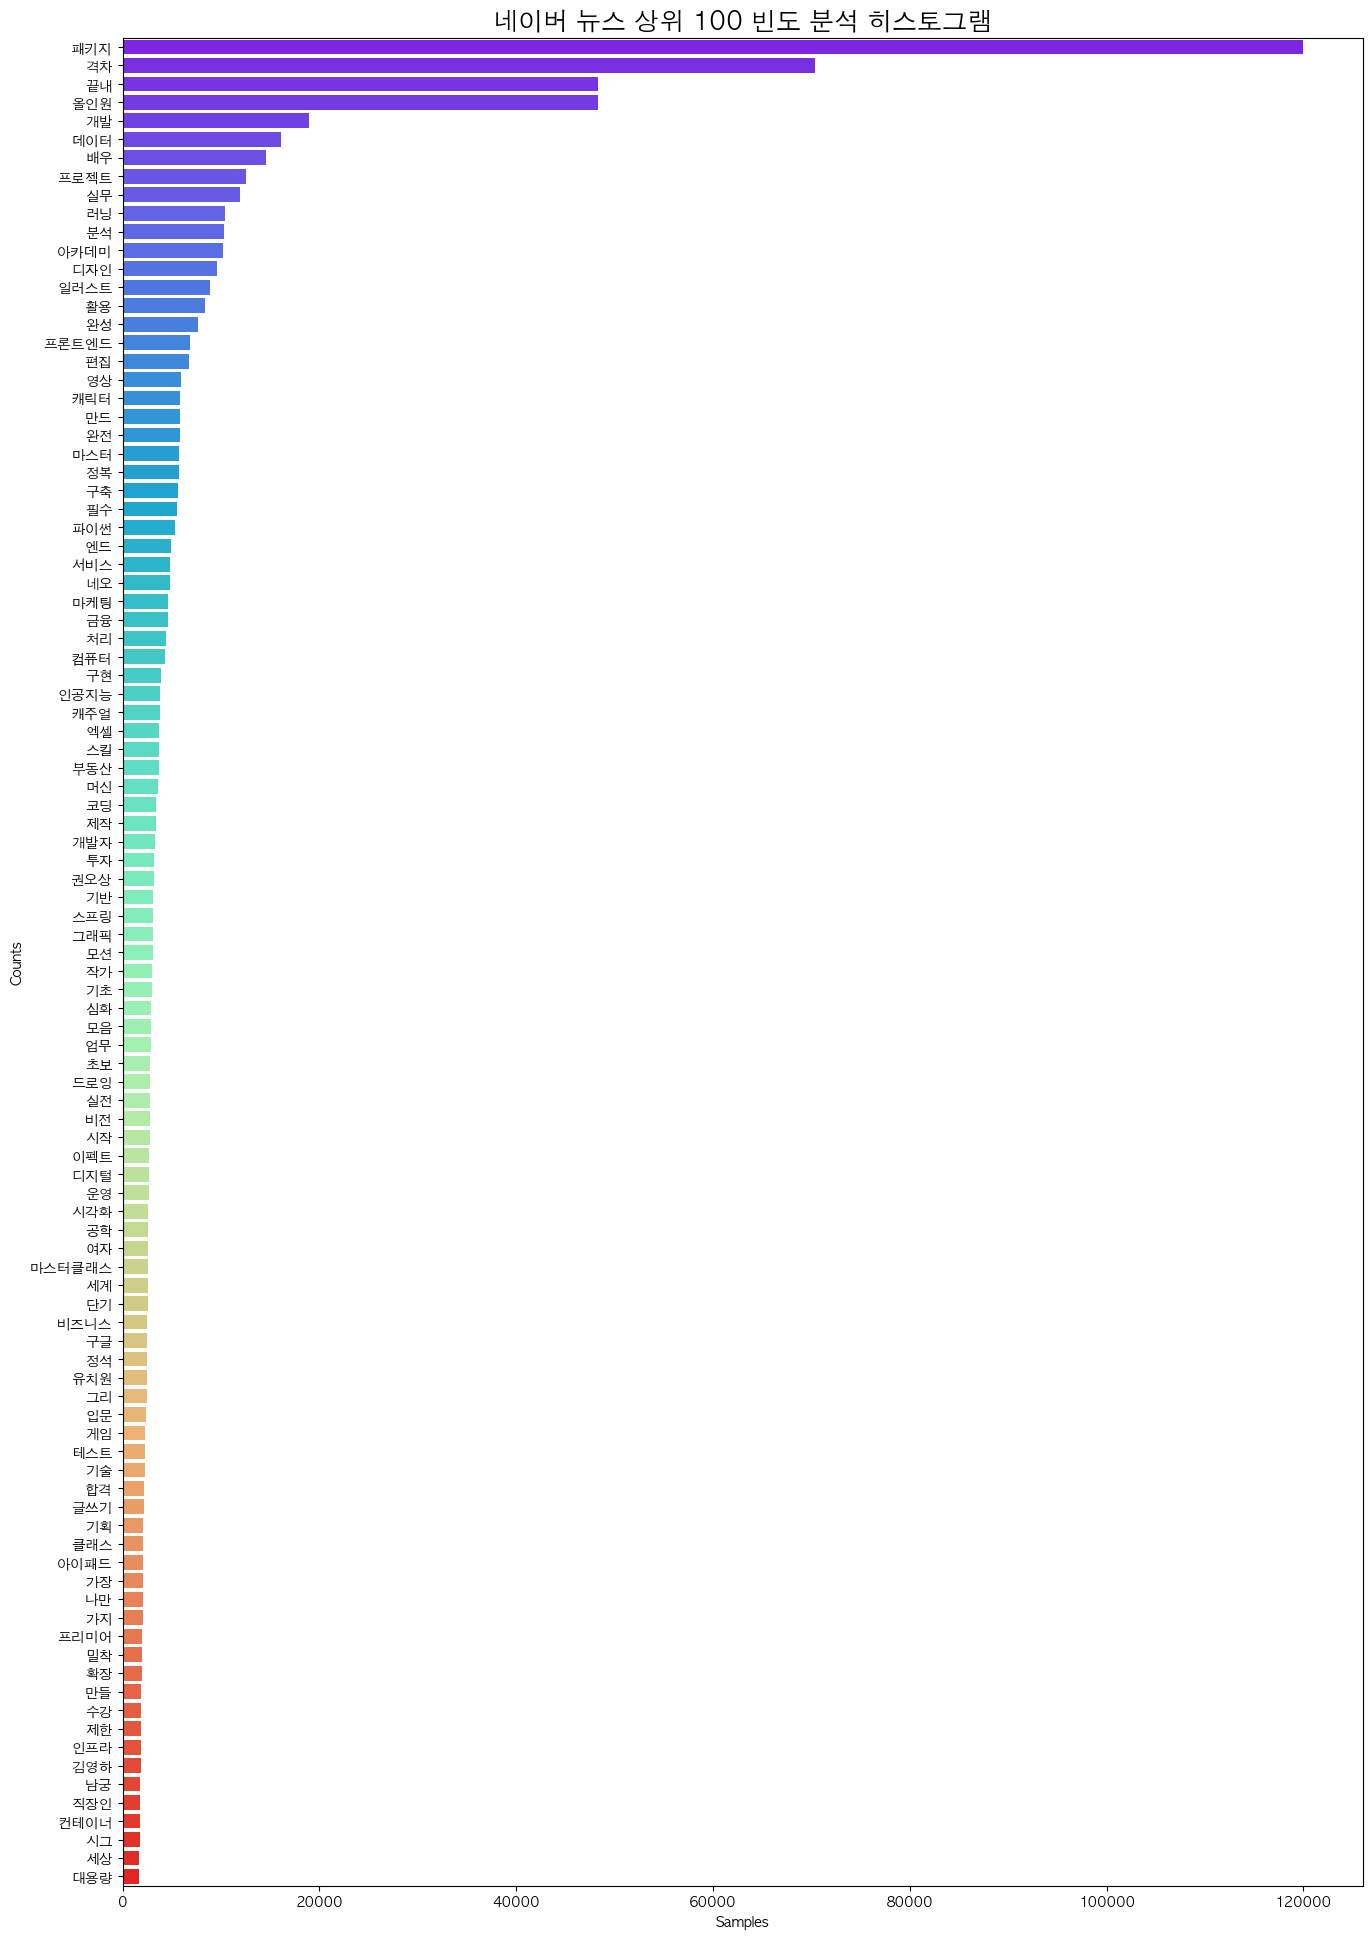

In [202]:
import seaborn as sns
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc
%matplotlib inline

# 글꼴 설정

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    font_name = font_manager.FontProperties(fname="/usr/share/fonts/nanumfont/NanumGothic.ttf")
    rc('font', family="NanumGothic")

plt.figure(figsize=(16, 24))
plt.title("네이버 뉴스 상위 %d 빈도 분석 히스토그램" % (topN) , fontsize=18)
plt.xlabel("Samples")
plt.ylabel("Counts")
sns.barplot(x="Samples", y="Counts", data=test, palette="rainbow")
# plt.xticks(rotation=45,fontsize=13)
plt.show()

In [203]:
from wordcloud import WordCloud

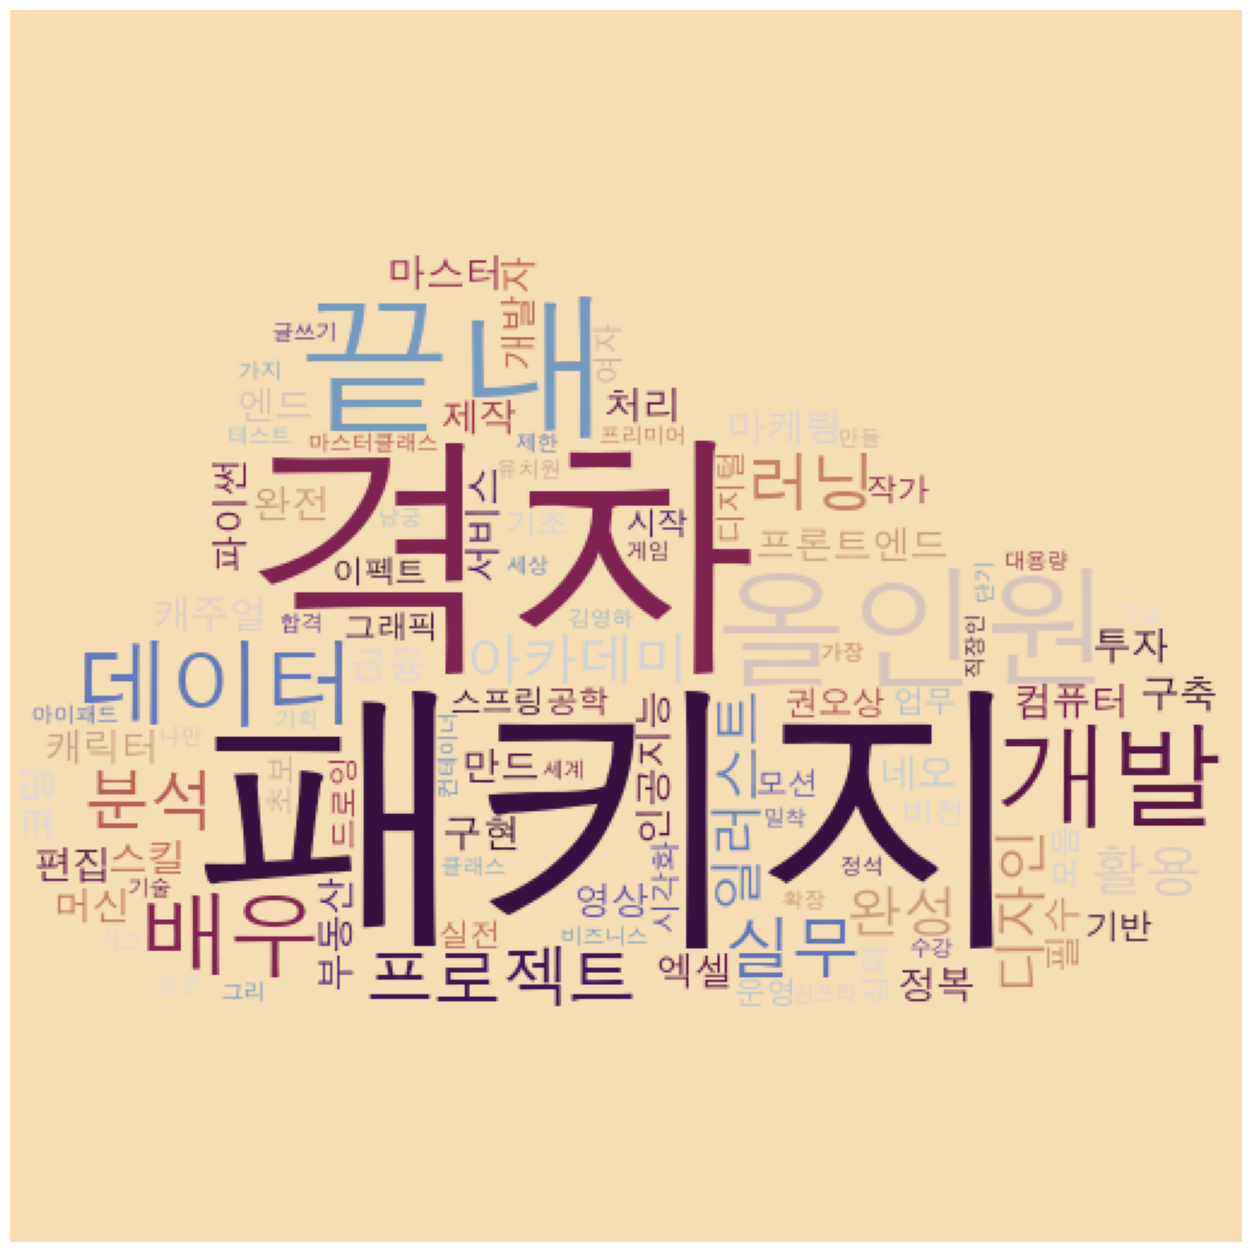

In [204]:
# 워드클라우드에 들어갈 단어 갯수 변경.
topN = 40

# for windows : font_path='c:/Windows/Fonts/malgun.ttf'
# for macOS : font_path = "/usr/share/fonts/nanumfont/NanumGothic.ttf"

# 워드클라우드 만들 배경 그림 경로. ex) cloud.png

mask = np.array(Image.open("./cloud.png"))
wordcloud = WordCloud(font_path = "AppleGothic",
                      relative_scaling = 0.2,
                      mask=mask,
                      background_color='wheat',
                      colormap="twilight"
                      ).generate_from_frequencies(wordInfo)
plt.figure(figsize=(16,16))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("./wordcloud_naverNews(count).png")
plt.show()

#TD-IDF 를 통한 키워드 추출

In [205]:
tokenized_documents

0                          [올인원, 패키지, 왼손, 파이썬, 업무, 자동, 유치원]
1                                [격차, 패키지, 끝내, 부동산, 금융, 실무]
2         [편집, 여자, 영상, 편집, 마스터클래스, 다양, 효과, 응용, 애프터, 이펙트,...
3                                   [격차, 패키지, 프로젝트, 배우, 개발]
4               [격차, 패키지, 개발자, 취업, 합격, 패스, 코딩, 테스트, 기술, 면접]
                                ...                        
159323                [올인원, 패키지, 월급, 만들, 직장, 스몰, 비즈니스, 가이드]
159324                   [미디어, 아트, 그래픽, 클래스, 모션, 그래픽, 패러다임]
159325                        [올인원, 패키지, 파이썬, 활용, 데이터, 전처리]
159326                         [올인원, 패키지, 움직이, 가지, 디자인, 원칙]
159327                      [올인원, 패키지, 머신, 러닝, 서비스, 구축, 실전]
Name: 코스(상품) 이름, Length: 159328, dtype: object

In [206]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

#TfidfVectorizer의 input으로 만들기 위한 전처리.
tfidf_docs = [" ".join(L) for L in tokenized_documents]

tfidf = TfidfVectorizer()
# X_tfidf.toarray()  #numpy array 로 변환해줌

# tfidf Document-Term Matrix로 변환
X_tfidf = tfidf.fit_transform(tfidf_docs)

terms = tfidf.get_feature_names()  # 사전(가나다)순으로 정렬.

tfidf_df = pd.DataFrame(data = X_tfidf.toarray(),
                        columns=terms)

display(tfidf_df)

# sum tfidf frequency of each term through documents
sums = X_tfidf.sum(axis=0) ##mean(=sum)   vs max

# connecting term to its sums frequency
df = []
for col, term in enumerate(terms):
    df.append( (term, sums[0,col] ))

ranking = pd.DataFrame(df, columns=['Term','TF-IDF'])
rankInfo = ranking.sort_values('TF-IDF', ascending=False)[:50]

x = list(rankInfo["Term"])
y = list(rankInfo["TF-IDF"])

tfidfInfo = dict()

for vocab, tfidf in zip(x, y):
    tfidfInfo[vocab] = tfidf

print(x[:5])
print(y[:5])
print()
print(rankInfo)

/opt/homebrew/Caskroom/miniconda/base/envs/test/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,가득,가볍,가이드,가장,가지,가치,감각,감독,감성,감지,...,활용,황선미,회계,회계사,회사,회수,효과,효율,후디니,히어로
0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.299478,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159323,0.0,0.0,0.411488,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
159324,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
159325,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.377679,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
159326,0.0,0.0,0.000000,0.0,0.48518,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


['패키지', '격차', '끝내', '올인원', '개발']
[17589.41183517454, 16588.83440227439, 14365.492547245625, 9767.201200824444, 8135.348620352565]

      Term        TF-IDF
622    패키지  17589.411835
25      격차  16588.834402
87      끝내  14365.492547
409    올인원   9767.201201
14      개발   8135.348620
119    데이터   5758.470139
648   프로젝트   5366.859160
220     배우   5043.614450
134    디자인   4691.748664
345     실무   4186.559605
142     러닝   4169.739315
235     분석   3877.663860
649  프론트엔드   3770.225298
410     완성   3023.127900
162    마스터   2880.128457
471   일러스트   2875.218261
357   아카데미   2801.914819
684     활용   2797.663245
615    파이썬   2773.652131
513     정복   2383.755262
659     필수   2376.839388
411     완전   2368.055500
387     엔드   2340.507883
279    서비스   2254.202719
47      구축   2220.960398
631     편집   2192.709407
573    캐릭터   2144.494182
463   인공지능   2127.988127
166     만드   2006.492951
399     영상   1962.137399
551     처리   1957.399991
579    컴퓨터   1906.878621
385     엑셀   1894.047241
318     스킬   1889.7

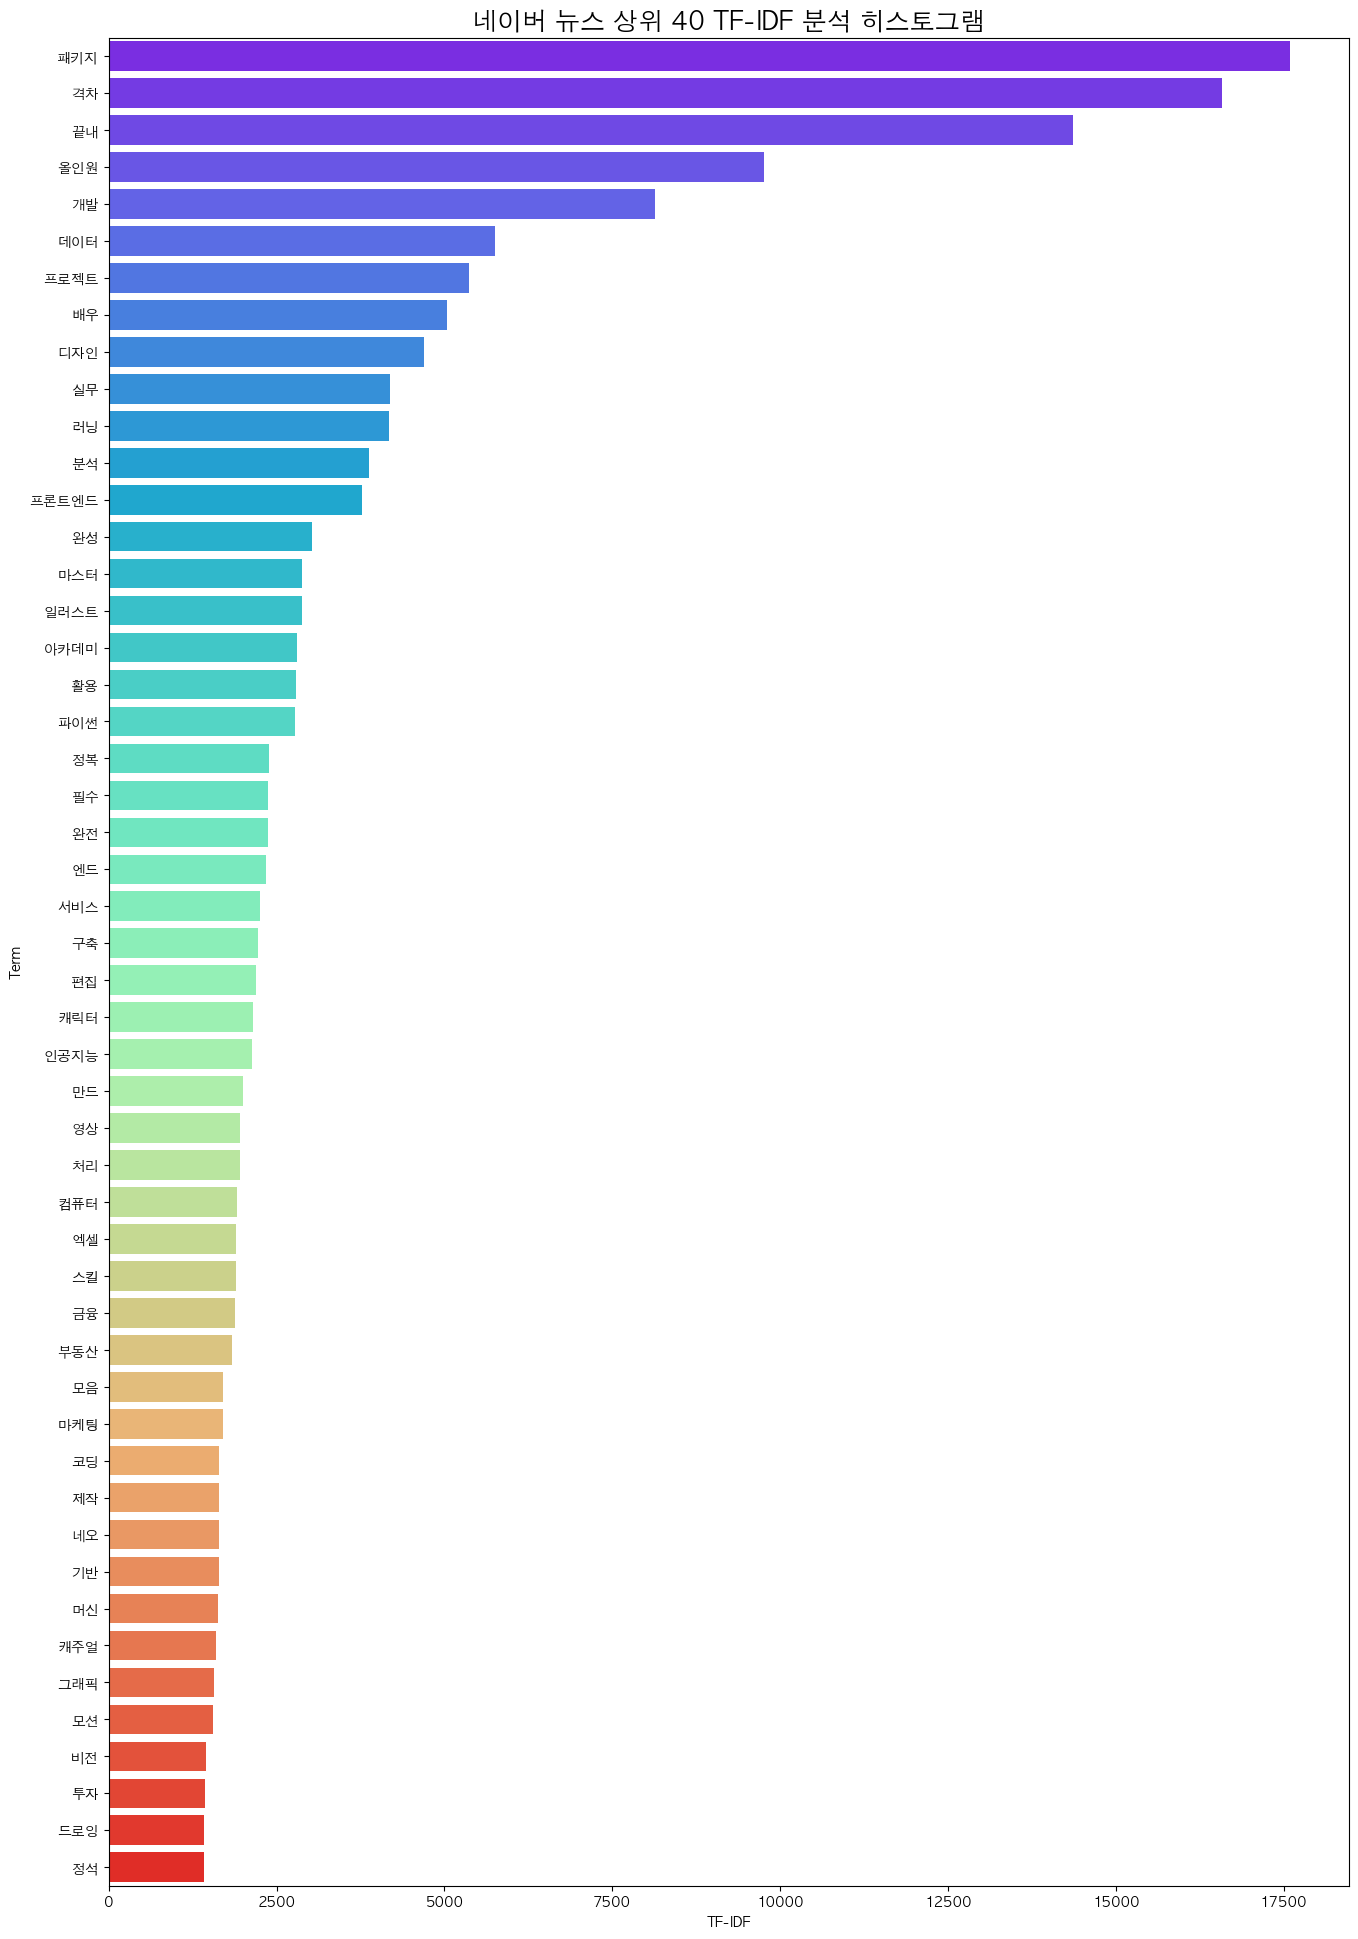

In [207]:
plt.figure(figsize=(16, 24))
plt.title("네이버 뉴스 상위 %d TF-IDF 분석 히스토그램" % (topN) , fontsize=18)
plt.xlabel("Samples")
plt.ylabel("Counts")
sns.barplot(x="TF-IDF", y="Term", data=rankInfo, palette="rainbow")
plt.show()

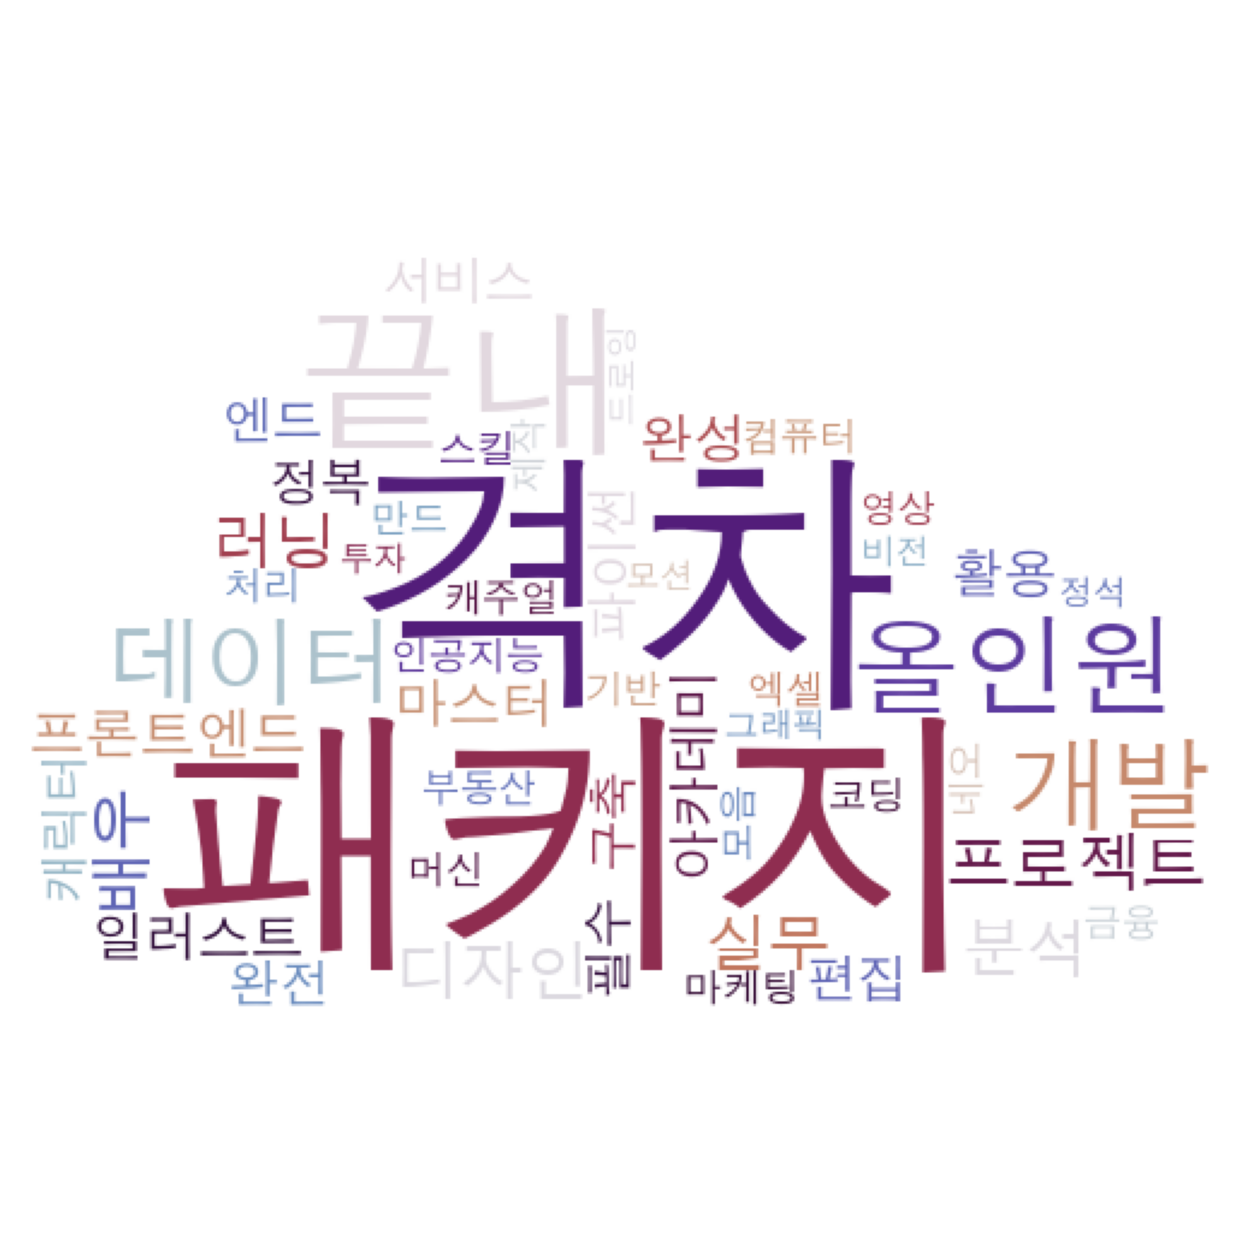

In [208]:
### 워드클라우드에 들어갈 단어 갯수 변경.

# for windows : font_path='c:/Windows/Fonts/malgun.ttf'
# for macOS : font_path = "/usr/share/fonts/nanumfont/NanumGothic.ttf"

# 워드클라우드 만들 배경 그림 경로. ex) cloud.png

mask = np.array(Image.open("./cloud.png"))
wordcloud = WordCloud(font_path = "AppleGothic",
                      relative_scaling = 0.2,
                      #stopwords=STOPWORDS,
                      mask=mask,
                      background_color='white',
                      colormap="twilight"
                      ).generate_from_frequencies(tfidfInfo)
plt.figure(figsize=(16,16))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("./wordcloud_naverNews(tfidf).png")
plt.show()

In [209]:
# 강의 대비 키워드 별 실판매 강의들을 분석하여
# 강의 제목에 어떠한 키워드가 포함됐을 때, 판매율이 높았는지 파악 -> 추후 강의들에 제목이나 시리즈를 이어서 제작하는 것에
# 인사이트를 줄 수 있음.

In [210]:
# 강의 수강 시간을 크롤링해서, 새로운 정보를 산정 -> 가장 많은 점유를 하고있는 2 카테고리만 크롤링,
# 이를 통해 패스트캠퍼스가 제목과 같이 올인원 형태의 강의만을 고집하는지, 그렇다면 다른 사이트들의 평균 강의 비용 대비
# 강의 시간은 어떻게 되는지 . 그걸 더욱 강조하여 판매를 하거나 분할하는 방법은 없을지.
# 그럼 다른 잘나가는 강의 사이트들 (인프런, 유데미) 을 파악하였을 때 어떤식의 강의를 생산하는 게 좋을지..
# 강의 시간 크롤링은 너무 힘든데,

In [211]:
df.info()

AttributeError: 'list' object has no attribute 'info'